<a href="https://colab.research.google.com/github/TanushreeBose26/data-projects/blob/main/ML_KNN_DSBA_Feb_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Program_Choice.csv", index_col = 0)

In [ ]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,vocation,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    float64
 1   female   200 non-null    object 
 2   ses      200 non-null    object 
 3   schtyp   200 non-null    object 
 4   prog     200 non-null    object 
 5   read     200 non-null    float64
 6   write    200 non-null    float64
 7   math     200 non-null    float64
 8   science  200 non-null    float64
 9   socst    200 non-null    float64
 10  honors   200 non-null    object 
 11  awards   200 non-null    float64
 12  cid      200 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 21.9+ KB


In [ ]:
df.drop(['id' , 'cid'] , axis =1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   female   200 non-null    object 
 1   ses      200 non-null    object 
 2   schtyp   200 non-null    object 
 3   prog     200 non-null    object 
 4   read     200 non-null    float64
 5   write    200 non-null    float64
 6   math     200 non-null    float64
 7   science  200 non-null    float64
 8   socst    200 non-null    float64
 9   honors   200 non-null    object 
 10  awards   200 non-null    float64
dtypes: float64(6), object(5)
memory usage: 18.8+ KB


In [ ]:
cat = []

num = []

for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)


print(cat)
print(num)

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
female,200,2,female,109
ses,200,3,middle,95
schtyp,200,2,public,168
prog,200,2,academic,105
honors,200,2,not enrolled,147


In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.0,71.0
awards,200.0,1.670,1.818691,0.0,0.00,1.0,2.0,7.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
## df.drop_duplicates(inplace=True) If present we can drop them like this

In [ ]:
for column in cat:
  print(column.upper() , ': ' , df[column].nunique())
  print(df[column].value_counts().sort_values())
  print('\n')

FEMALE :  2
male       91
female    109
Name: female, dtype: int64


SES :  3
low       47
high      58
middle    95
Name: ses, dtype: int64


SCHTYP :  2
private     32
public     168
Name: schtyp, dtype: int64


PROG :  2
vocation     95
academic    105
Name: prog, dtype: int64


HONORS :  2
enrolled         53
not enrolled    147
Name: honors, dtype: int64




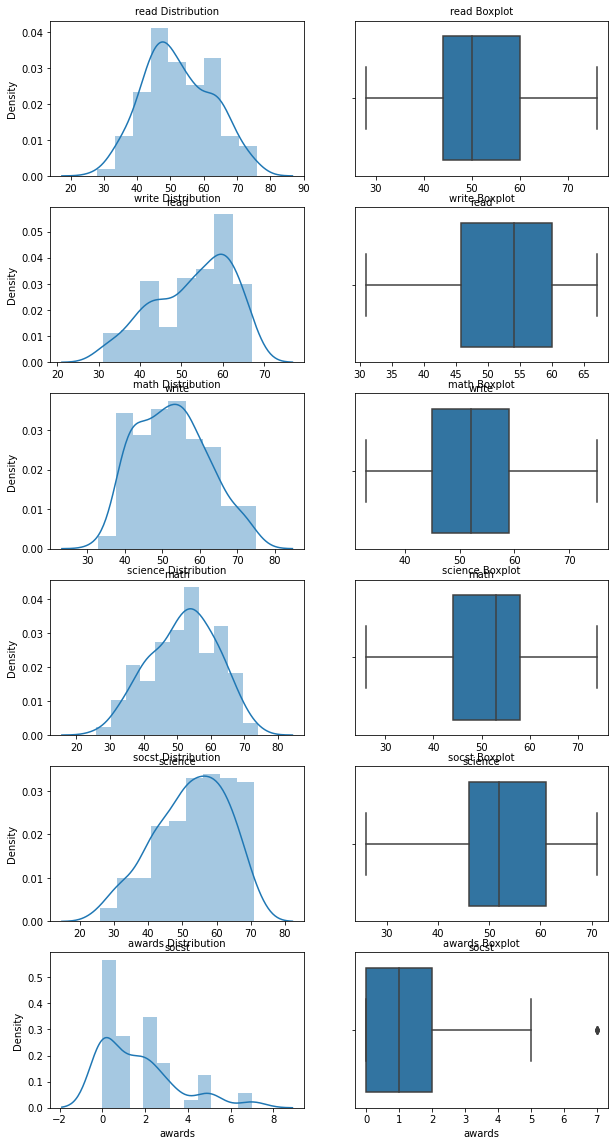

In [ ]:
# EDA - Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings( "ignore")


fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['read'] , ax=axes[0][0])
a.set_title("read Distribution",fontsize=10)

a = sns.boxplot(df['read'] , orient = "v" , ax=axes[0][1])
a.set_title("read Boxplot",fontsize=10)

a = sns.distplot(df['write'] , ax=axes[1][0])
a.set_title("write Distribution",fontsize=10)

a = sns.boxplot(df['write'] , orient = "v" , ax=axes[1][1])
a.set_title("write Boxplot",fontsize=10)


a = sns.distplot(df['math'] , ax=axes[2][0])
a.set_title("math Distribution",fontsize=10)

a = sns.boxplot(df['math'] , orient = "v" , ax=axes[2][1])
a.set_title("math Boxplot",fontsize=10)


a = sns.distplot(df['science'] , ax=axes[3][0])
a.set_title("science Distribution",fontsize=10)

a = sns.boxplot(df['science'] , orient = "v" , ax=axes[3][1])
a.set_title("science Boxplot",fontsize=10)

a = sns.distplot(df['socst'] , ax=axes[4][0])
a.set_title("socst Distribution",fontsize=10)

a = sns.boxplot(df['socst'] , orient = "v" , ax=axes[4][1])
a.set_title("socst Boxplot",fontsize=10)


a = sns.distplot(df['awards'] , ax=axes[5][0])
a.set_title("awards Distribution",fontsize=10)

a = sns.boxplot(df['awards'] , orient = "v" , ax=axes[5][1])
a.set_title("awards Boxplot",fontsize=10)

plt.show()

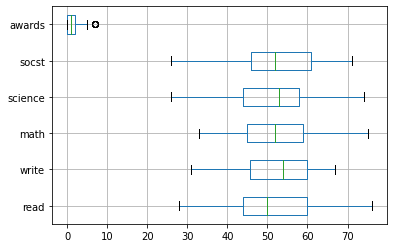

In [ ]:
df.boxplot(vert=False)

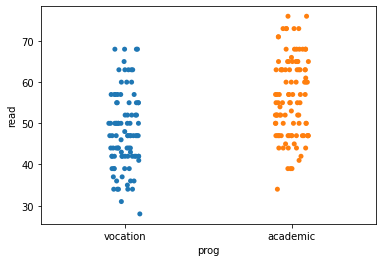

In [ ]:
# Bivariate Analsysis - Compare the Target column with each feature column

sns.stripplot(df['prog'] , df['read'])

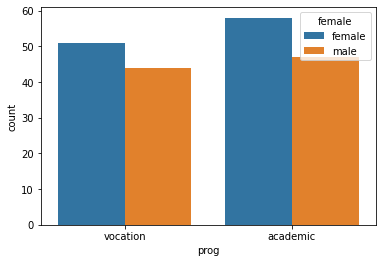

In [ ]:
sns.countplot(df['prog'], hue=df['female'])

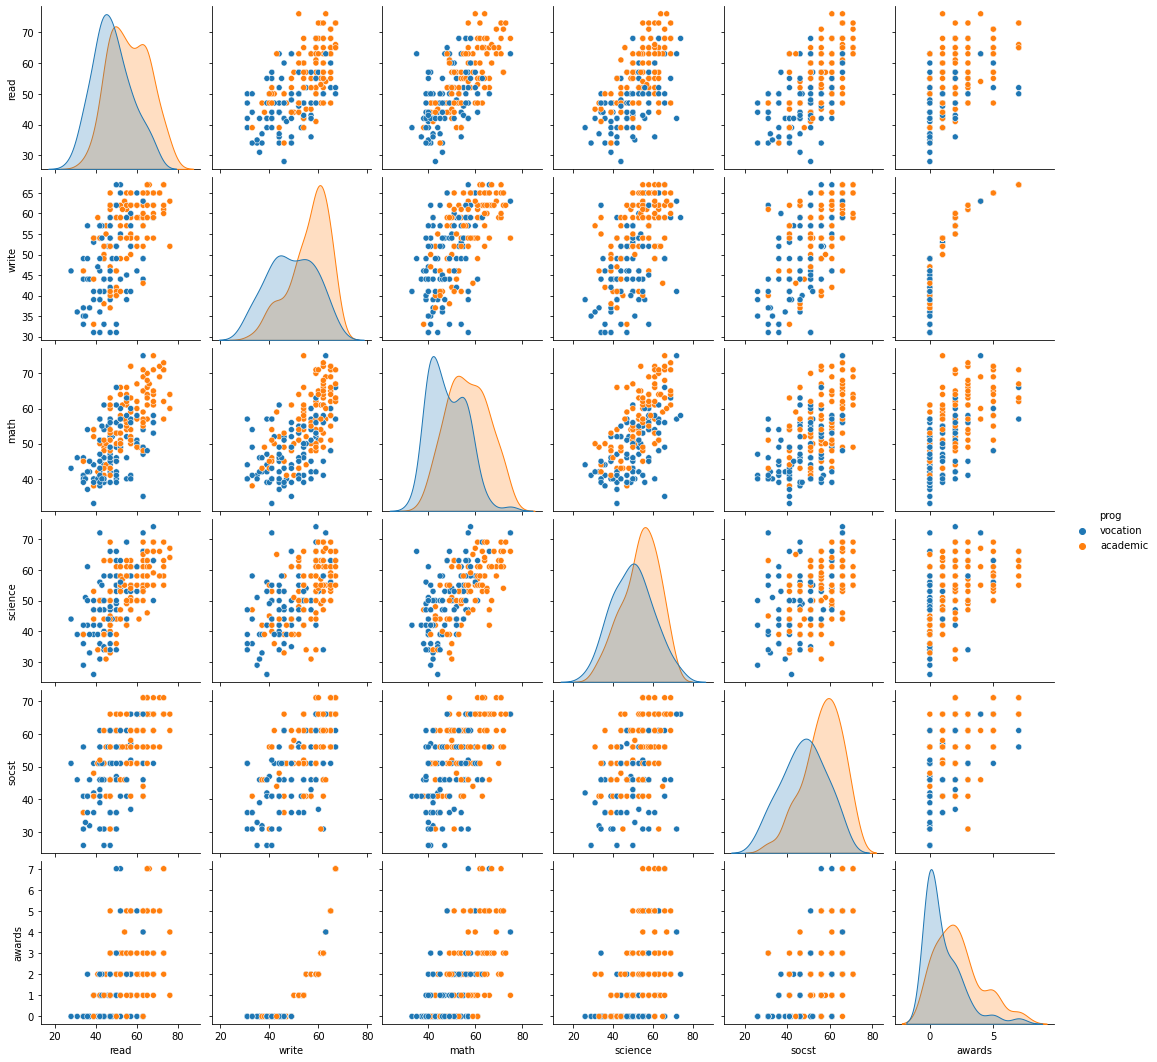

In [ ]:
sns.pairplot(df , hue = 'prog')

In [ ]:
# Outlier Treatment - Capping Method

# define a custom function that calculates the min,max values of a cont variable using the IQR logic

def outlier_detect(col):
  sorted(col)
  Q1,Q3 = np.percentile(col, [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)

  return lower_range,upper_range

In [ ]:
lr,ur = outlier_detect(df['awards'])

df['awards'] = np.where(df['awards'] > ur , ur , df['awards'])
df['awards'] = np.where(df['awards'] < lr , lr , df['awards'])

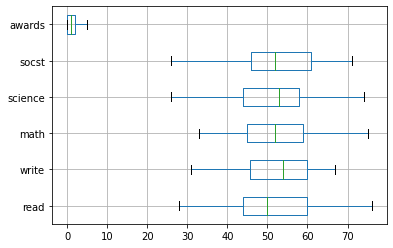

In [ ]:
df.boxplot(vert=False)

In [ ]:
cat

['female', 'ses', 'schtyp', 'prog', 'honors']

In [ ]:
df = pd.get_dummies(df , columns = ['female', 'schtyp', 'honors'], drop_first=True)

In [ ]:
df.head()

,ses,prog,read,write,math,science,socst,awards,female_male,schtyp_public,honors_not enrolled
0,low,vocation,34.0,35.0,41.0,29.0,26.0,0.0,0,1,1
1,middle,vocation,34.0,33.0,41.0,36.0,36.0,0.0,1,1,1
2,high,vocation,39.0,39.0,44.0,26.0,42.0,0.0,1,1,1
3,low,vocation,37.0,37.0,42.0,33.0,32.0,0.0,1,1,1
4,middle,vocation,39.0,31.0,40.0,39.0,51.0,0.0,1,1,1


In [ ]:
df['ses'] = df['ses'].replace({'low' : 1 , 'middle' : 2 , 'high' : 3})

In [ ]:
df.head()

,ses,prog,read,write,math,science,socst,awards,female_male,schtyp_public,honors_not enrolled
0,1,vocation,34.0,35.0,41.0,29.0,26.0,0.0,0,1,1
1,2,vocation,34.0,33.0,41.0,36.0,36.0,0.0,1,1,1
2,3,vocation,39.0,39.0,44.0,26.0,42.0,0.0,1,1,1
3,1,vocation,37.0,37.0,42.0,33.0,32.0,0.0,1,1,1
4,2,vocation,39.0,31.0,40.0,39.0,51.0,0.0,1,1,1


In [ ]:
X = df.drop('prog' , axis = 1)
y = df['prog']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
y_train.value_counts()

academic    70
vocation    70
Name: prog, dtype: int64

In [ ]:
y_test.value_counts()

academic    35
vocation    25
Name: prog, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()


X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# K-nn is also called a lazy algorithm because most of the calculations happen during predict, not during fit

In [ ]:
## Performance Matrix on train data set
from sklearn.metrics import confusion_matrix,classification_report

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.7928571428571428
[[56 14]
 [15 55]]
              precision    recall  f1-score   support

    academic       0.79      0.80      0.79        70
    vocation       0.80      0.79      0.79        70

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.65
[[21 14]
 [ 7 18]]
              precision    recall  f1-score   support

    academic       0.75      0.60      0.67        35
    vocation       0.56      0.72      0.63        25

    accuracy                           0.65        60
   macro avg       0.66      0.66      0.65        60
weighted avg       0.67      0.65      0.65        60



In [ ]:
# fine tuning the hyper parameters

# n_neighbors

#Default value n_neighbors=5, lets check the performance for K=7

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
## Performance Matrix on train data set
from sklearn.metrics import confusion_matrix,classification_report

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.7785714285714286
[[56 14]
 [17 53]]
              precision    recall  f1-score   support

    academic       0.77      0.80      0.78        70
    vocation       0.79      0.76      0.77        70

    accuracy                           0.78       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.78      0.78      0.78       140



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6666666666666666
[[21 14]
 [ 6 19]]
              precision    recall  f1-score   support

    academic       0.78      0.60      0.68        35
    vocation       0.58      0.76      0.66        25

    accuracy                           0.67        60
   macro avg       0.68      0.68      0.67        60
weighted avg       0.69      0.67      0.67        60



In [ ]:
ac_scores_train = []
ac_scores_test = []

for i in range(1,30,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  #Evaluate train
  score1 = knn.score(X_train,y_train)
  ac_scores_train.append(score1)

  #Evaluate test
  score2 = knn.score(X_test,y_test)
  ac_scores_test.append(score2)

  

In [ ]:
ac_scores_train

[1.0,
 0.8142857142857143,
 0.7928571428571428,
 0.7785714285714286,
 0.7785714285714286,
 0.7785714285714286,
 0.7428571428571429,
 0.75,
 0.7357142857142858,
 0.7357142857142858,
 0.7357142857142858,
 0.7285714285714285,
 0.7285714285714285,
 0.7285714285714285,
 0.7214285714285714]

In [ ]:
ac_scores_test

[0.5666666666666667,
 0.6333333333333333,
 0.65,
 0.6666666666666666,
 0.6333333333333333,
 0.6666666666666666,
 0.7166666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7166666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7166666666666667,
 0.75,
 0.75]

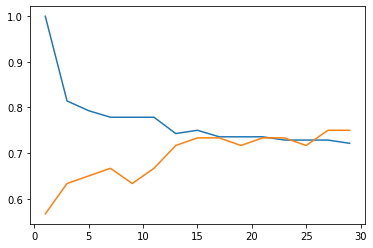

In [ ]:
plt.plot(range(1,30,2) , ac_scores_train)
plt.plot(range(1,30,2) , ac_scores_test)

In [ ]:
# Model variance & Bias



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn import metrics
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.75
[[56 14]
 [21 49]]
              precision    recall  f1-score   support

    academic       0.73      0.80      0.76        70
    vocation       0.78      0.70      0.74        70

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7333333333333333
[[25 10]
 [ 6 19]]
              precision    recall  f1-score   support

    academic       0.81      0.71      0.76        35
    vocation       0.66      0.76      0.70        25

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.74        60



In [ ]:
params = {'n_neighbors':[13,15,17,19],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size' : [15,30,45]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier() , param_grid=params , refit = True , scoring = 'accuracy' , cv = 3, verbose = 1)

grid_knn.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 45],
                         'n_neighbors': [13, 15, 17, 19]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 17}

In [ ]:
from sklearn.metrics import accuracy_score

print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_knn.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test))))

Train Accuracy is : 0.7357142857142858

Test Accuracy is : 0.7333333333333333
